In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error,root_mean_squared_error,r2_score

In [2]:
df=pd.read_csv(r"C:\Users\NTCUONG\notebook\training_LR\training9.csv")
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_WD,SaleType_nan,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_nan,SalePrice
0,0.150094,0.245503,0.823713,0.467041,0.277781,0.452097,0.448408,0.101483,0.326545,0.0,...,0.456083,0,0.000000,0.0,0.0,0.0,0.456083,0.0,0,208500
1,0.043703,0.275451,0.858747,0.357852,0.408238,0.401561,0.398284,0.000000,0.409536,0.0,...,0.412913,0,0.000000,0.0,0.0,0.0,0.412913,0.0,0,181500
2,0.118369,0.200515,0.890164,0.365548,0.217228,0.353258,0.350562,0.066415,0.177987,0.0,...,0.361126,0,0.000000,0.0,0.0,0.0,0.361126,0.0,0,223500
3,0.159661,0.203803,0.859960,0.423637,0.251885,0.391060,0.399603,0.000000,0.091011,0.0,...,0.415474,0,0.417033,0.0,0.0,0.0,0.000000,0.0,0,140000
4,0.094960,0.199563,0.918120,0.335099,0.172546,0.280525,0.278236,0.115649,0.193337,0.0,...,0.291058,0,0.000000,0.0,0.0,0.0,0.291058,0.0,0,250000


In [3]:
corr=df.corr()

In [4]:
df.corr().sort_values("SalePrice",ascending=False).head(10)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_WD,SaleType_nan,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_nan,SalePrice
SalePrice,-0.187647,-0.150612,0.228492,0.030433,-0.394900,-0.393929,-0.401973,0.286089,0.209935,-0.056868,...,-0.423426,NaN,-0.139545,-0.051458,-0.030231,-0.049619,-0.338044,0.273673,NaN,1.000000
BsmtQual_Ex,-0.019162,0.029625,-0.004661,0.153260,-0.114671,-0.048726,-0.053646,0.226263,0.196354,-0.036025,...,-0.206695,NaN,-0.045265,-0.014686,-0.024430,-0.031567,-0.170257,0.307506,NaN,0.451608
KitchenQual_Ex,-0.008671,-0.015889,-0.001595,0.123222,-0.057121,-0.059439,-0.059953,0.120338,0.146168,-0.038462,...,-0.133922,NaN,0.049378,-0.013164,-0.021899,-0.028297,-0.165153,0.190471,NaN,0.409421
ExterQual_Ex,-0.043465,-0.002081,0.037454,0.084736,-0.084612,-0.086550,-0.088374,0.216657,0.111300,-0.034108,...,-0.192771,NaN,-0.046799,-0.009523,-0.015841,-0.020469,-0.160383,0.240313,NaN,0.404878
Neighborhood_NridgHt,0.079830,0.011417,-0.060334,0.180990,-0.053661,0.014349,0.010042,0.207970,0.098621,-0.051179,...,-0.091817,NaN,-0.056647,-0.011527,-0.019174,-0.024776,-0.048898,0.173688,NaN,0.313647
ExterQual_Gd,0.244144,0.127291,-0.271118,0.500648,0.062334,0.222969,0.213852,0.138024,0.093554,-0.080887,...,0.020290,NaN,-0.045175,-0.033648,-0.050994,-0.038926,0.054771,0.242718,NaN,0.307234
Foundation_PConc,0.294030,0.138138,-0.309576,0.539514,0.079992,0.286325,0.275757,0.187246,0.134822,-0.131092,...,0.067493,NaN,-0.068619,0.020954,-0.042032,-0.034403,0.078990,0.286249,NaN,0.306703
Fireplaces,0.063250,0.047981,-0.071323,0.203926,-0.014197,0.007862,0.003995,0.146287,0.132208,-0.002821,...,-0.008842,NaN,-0.092457,-0.046835,-0.022880,-0.004424,0.044421,0.036288,NaN,0.296400
Neighborhood_NoRidge,-0.053253,0.002040,0.061684,-0.005377,-0.120317,-0.107713,-0.110160,0.197925,0.082584,-0.044654,...,-0.039500,NaN,-0.001196,-0.008586,-0.014284,-0.018456,-0.044507,-0.047499,NaN,0.292830
MasVnrArea,0.226652,0.020592,-0.232376,0.282195,0.032106,0.138909,0.130019,1.000000,0.209548,-0.087016,...,0.046362,NaN,-0.007775,-0.012815,0.015781,0.050269,0.038061,0.075631,NaN,0.286089


In [5]:
def create_df(col_list):
    df_fs=df["SalePrice"]
    for col in col_list:
        df_fs=pd.concat([df[col],df_fs],axis=1)
    return df_fs

In [6]:
model=GradientBoostingRegressor()

In [7]:
def eval(df_fs):
    X_train,X_test,y_train,y_test=train_test_split(df_fs.iloc[:,:-1],df_fs.iloc[:,-1],test_size=0.2,random_state=42)
    model.fit(X_train,y_train)
    y_pre=model.predict(X_test)
    k.append(i)
    mae.append(mean_absolute_error(y_test,y_pre))
    rmse.append(root_mean_squared_error(y_test,y_pre))
    r2.append(r2_score(y_test,y_pre))

### FEATURE SELECTION DEPEND ON CORRELATION MATRIX

plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),cmap='coolwarm')

In [8]:
c=corr.sort_values("SalePrice",ascending=False).head(10).index
c

Index(['SalePrice', 'BsmtQual_Ex', 'KitchenQual_Ex', 'ExterQual_Ex',
       'Neighborhood_NridgHt', 'ExterQual_Gd', 'Foundation_PConc',
       'Fireplaces', 'Neighborhood_NoRidge', 'MasVnrArea'],
      dtype='object')

In [9]:
k, mae, rmse, r2 = [], [], [], []
for i in range(10,120):
    c=corr.sort_values("SalePrice",ascending=False).iloc[1:i,:].index
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

,K,MAE,RMSE,r2
0,10,29066.997045,40161.972294,0.789711
1,11,29121.490728,40930.646336,0.781585
2,12,28632.953865,40144.969426,0.789889
3,13,28076.091307,39487.583498,0.796714
4,14,28204.024391,39345.950070,0.798170
...,...,...,...,...
105,115,22043.960306,31696.654700,0.869018
106,116,22018.257328,31706.765746,0.868934
107,117,21965.707558,31673.355794,0.869210
108,118,21954.315061,31657.793013,0.869339


In [10]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
50,60,21389.228824,30726.398515,0.876914
18,28,21510.522775,30205.998977,0.881048
31,41,21514.851492,30543.422649,0.878375
19,29,21521.207821,30245.471955,0.880737
52,62,21544.000299,31008.096905,0.874647
...,...,...,...,...
3,13,28076.091307,39487.583498,0.796714
4,14,28204.024391,39345.950070,0.798170
2,12,28632.953865,40144.969426,0.789889
0,10,29066.997045,40161.972294,0.789711


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_3128\3627608168.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_3128\3627608168.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


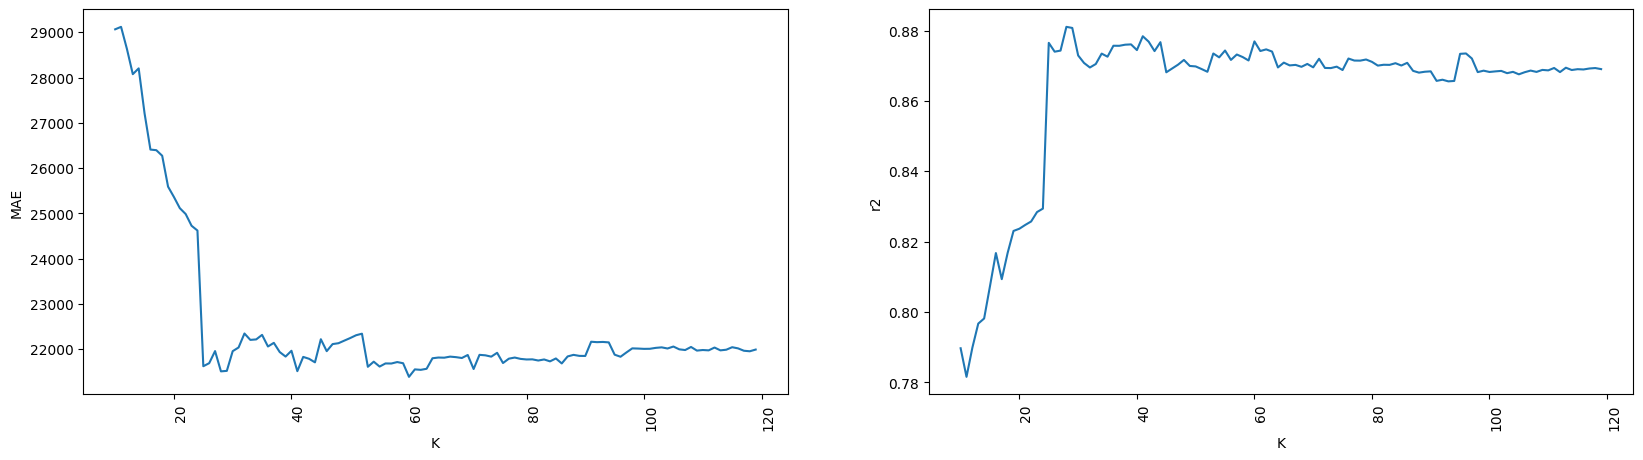

In [11]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### FEATURE SELECTION BY REMOVE FEATURE WITH LOW VARIENCE


### 1.CALCULATE VARIENCE FOR EACH FEATURE

In [12]:
varr=np.var(df)
varr

D:\miniconda\lib\site-packages\numpy\core\fromnumeric.py:3785: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


MSSubClass               3.261382e-02
LotFrontage              5.107832e-03
LotArea                  2.617346e-02
OverallQual              2.393219e-02
OverallCond              1.685412e-02
                             ...     
SaleCondition_Family     3.132392e-03
SaleCondition_Normal     4.913976e-02
SaleCondition_Partial    2.113360e-02
SaleCondition_nan        0.000000e+00
SalePrice                6.306789e+09
Length: 305, dtype: float64

In [13]:
varr.loc[varr > 0.1].index

Index(['SalePrice'], dtype='object')

### 2.USING VarianceThreshold FROM SKLEARN

In [14]:
from sklearn.feature_selection import VarianceThreshold

In [15]:
varr_thresh=VarianceThreshold(threshold=0.1)
varr_thresh.fit_transform(df)
selected_columns = df.columns[varr_thresh.get_support()]
selected_columns

Index(['SalePrice'], dtype='object')

In [16]:
k, mae, rmse, r2 = [], [], [], []
for i in range(100,500):
    varr_thresh=VarianceThreshold(threshold=i/100000)
    varr_thresh.fit_transform(df.iloc[:,:-1])
    selected_columns = df.iloc[:,:-1].columns[varr_thresh.get_support()]
    df_fs=create_df(selected_columns)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

,K,MAE,RMSE,r2
0,100,19505.323739,29702.923442,0.884977
1,101,19475.467367,29680.740028,0.885149
2,102,19584.147900,29903.500378,0.883418
3,103,19625.603159,30041.973369,0.882336
4,104,19491.955438,29871.236497,0.883670
...,...,...,...,...
395,495,19348.564859,30756.017209,0.876676
396,496,19266.154202,30551.922891,0.878308
397,497,19359.694582,30813.401862,0.876216
398,498,19281.985398,30762.647124,0.876623


In [17]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
268,368,19174.999778,30790.643265,0.876399
234,334,19191.576343,30581.979256,0.878068
386,486,19196.713153,30552.609201,0.878302
374,474,19203.605523,30634.418460,0.877650
225,325,19208.785029,30563.586656,0.878215
...,...,...,...,...
111,211,19744.149510,30886.623602,0.875627
47,147,19749.180317,30002.017500,0.882649
93,193,19776.091390,30848.183901,0.875936
106,206,19793.111124,30706.368059,0.877074


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_3128\873788412.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_3128\873788412.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


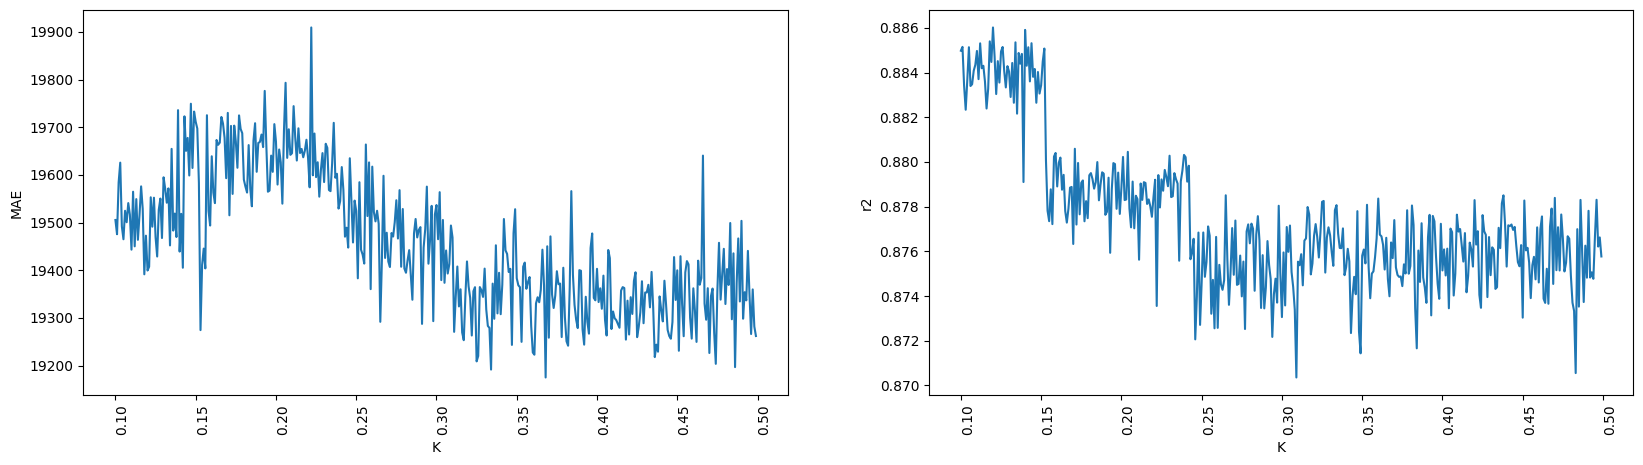

In [18]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x=statistic["K"]/1000,y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x=statistic["K"]/1000,y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### Univariate feature selection


### Statistic function (r_regression, f_regression, mutual_info_regression)

### 1. r_regression


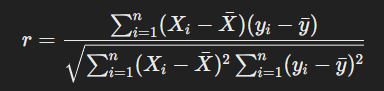

### Using numpy

In [19]:
def similitary_score(x,y):
    x_avg=np.average(x)
    y_avg=np.average(y)
    up=np.sum((x-x_avg)*(y-y_avg))
    down=np.sqrt(np.sum((x-x_avg)**2)*np.sum((y-y_avg)**2))
    return up/down

In [20]:
print(similitary_score(df["OverallQual"],df["SalePrice"]))

0.0304326175489076


In [21]:
top_feature=[]
for col in df.columns:
    score=similitary_score(df[col],df["SalePrice"])
    if col != "SalePrice" and score > 0.6:
        top_feature.append([col,score])
top_feature

C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_3128\2326211799.py:6: RuntimeWarning: invalid value encountered in scalar divide
  return up/down


[]

### Using sklearn

In [22]:
from sklearn.feature_selection import r_regression
from sklearn.feature_selection import SelectKBest
# for i in range(5,21):
fs=SelectKBest(r_regression,k=6)
fl_df=fs.fit_transform(df.iloc[:,:-1],df.iloc[:,-1])
# selected=df.columns[fs.get_support()]
fs.get_feature_names_out()

array(['Neighborhood_NridgHt', 'ExterQual_Ex', 'ExterQual_Gd',
       'Foundation_PConc', 'BsmtQual_Ex', 'KitchenQual_Ex'], dtype=object)

In [23]:
k, mae, rmse, r2 = [], [], [], []

for i in range(5,120):
    fs=SelectKBest(r_regression,k=i)
    fl_df=fs.fit_transform(df.iloc[:,:-1],df.iloc[:,-1])
    c=fs.get_feature_names_out()
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic.to_csv("r_regression_label_enc.csv")
statistic


,K,MAE,RMSE,r2
0,5,35890.359891,50901.949232,0.662204
1,6,34660.461597,50002.241821,0.674039
2,7,31564.708773,45860.413561,0.725803
3,8,30212.362959,41950.167250,0.770568
4,9,28986.486315,40015.679080,0.791240
...,...,...,...,...
110,115,21814.597153,31668.144146,0.869253
111,116,21786.549622,31645.795929,0.869438
112,117,22088.993428,31976.786881,0.866692
113,118,22124.740073,32005.206735,0.866455


In [24]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
55,60,21480.630122,30910.930653,0.875431
54,59,21491.521933,30962.243936,0.875017
57,62,21501.146990,31003.508872,0.874684
22,27,21503.972985,30235.760670,0.880813
35,40,21516.794621,30453.950368,0.879087
...,...,...,...,...
5,10,29171.601133,41080.132541,0.779986
3,8,30212.362959,41950.167250,0.770568
2,7,31564.708773,45860.413561,0.725803
1,6,34660.461597,50002.241821,0.674039


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_3128\3627608168.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_3128\3627608168.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


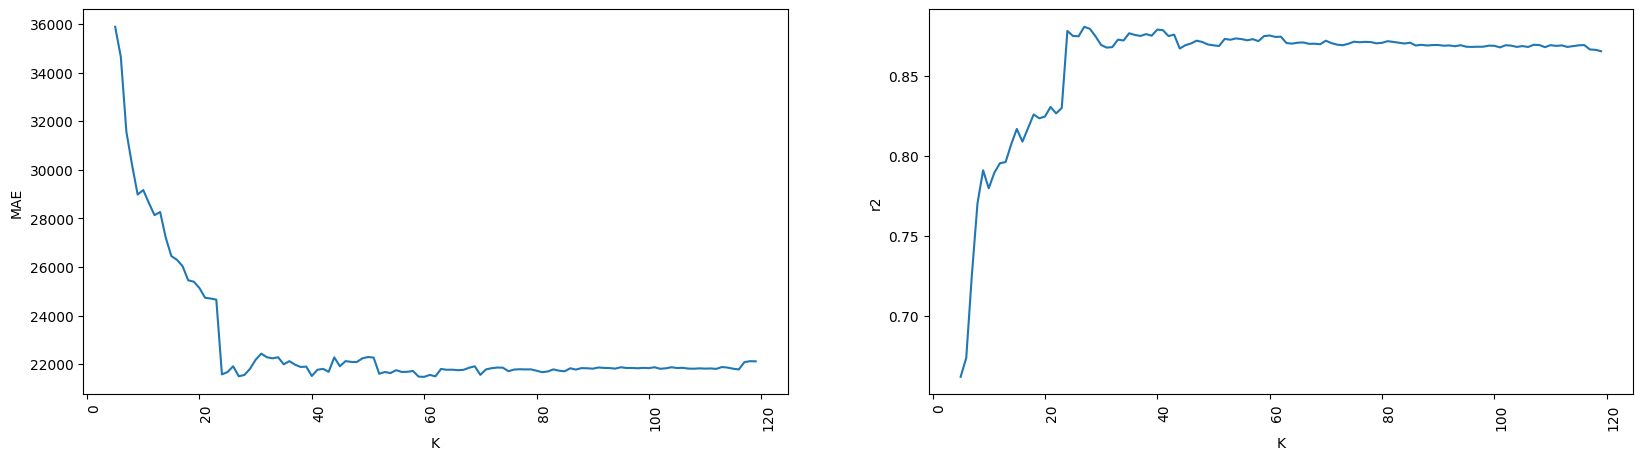

In [25]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### 2.f_regression

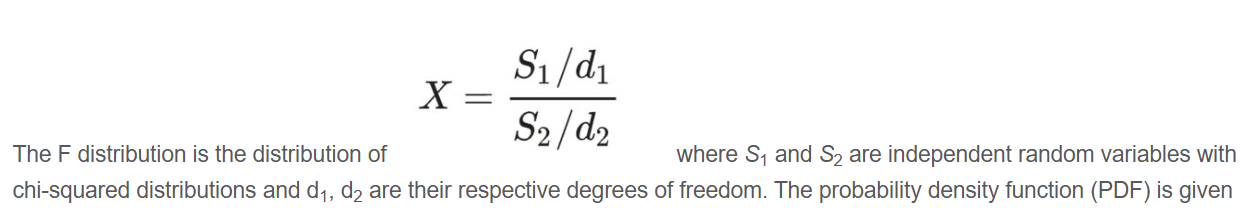

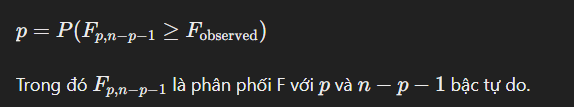

In [26]:
from sklearn.feature_selection import f_regression

In [27]:
k, mae, rmse, r2 = [], [], [], []
for i in range(5,120):
    fs=SelectKBest(f_regression,k=i)
    fl_df=fs.fit_transform(df.iloc[:,:-1],df.iloc[:,-1])
    c=fs.get_feature_names_out()
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic.to_csv("f_regression_label_enc.csv")
statistic

,K,MAE,RMSE,r2
0,5,34354.505424,51440.370481,0.655020
1,6,33572.804895,50895.643927,0.662287
2,7,31998.620106,47606.662232,0.704524
3,8,31284.920167,46590.490643,0.717004
4,9,31376.756052,46259.713117,0.721008
...,...,...,...,...
110,115,19547.763778,30557.023160,0.878267
111,116,19783.132247,31223.937471,0.872895
112,117,19642.594200,30488.959965,0.878809
113,118,19589.283325,30425.147489,0.879315


In [28]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
110,115,19547.763778,30557.023160,0.878267
108,113,19548.850958,30361.392169,0.879821
109,114,19562.548162,30262.934428,0.880599
72,77,19585.772999,30437.755717,0.879215
113,118,19589.283325,30425.147489,0.879315
...,...,...,...,...
6,11,31307.925206,45360.192126,0.731752
4,9,31376.756052,46259.713117,0.721008
2,7,31998.620106,47606.662232,0.704524
1,6,33572.804895,50895.643927,0.662287


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_3128\3627608168.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_3128\3627608168.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


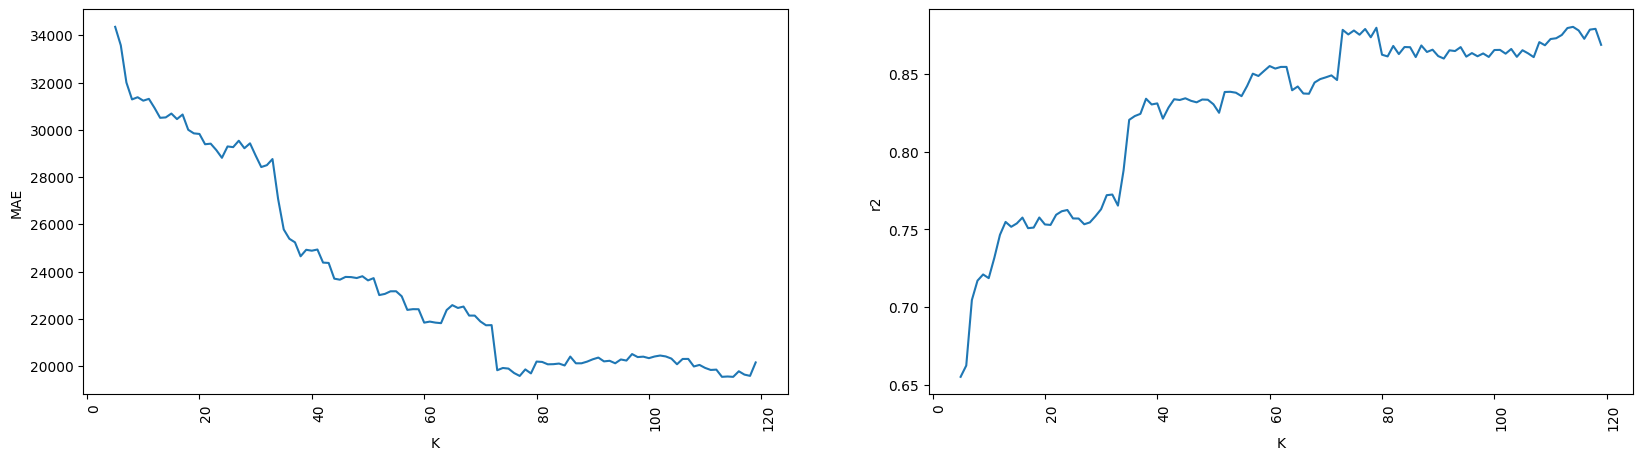

In [29]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### 3.Mutual infomation

### Fomula

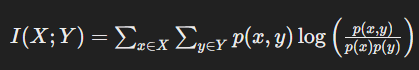

### Mesure dependency of 2 variable X,Y

### KDE method (Estimate Probability Density Function)

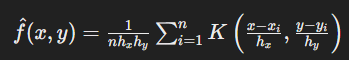

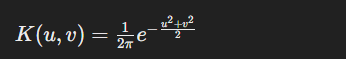

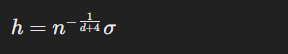

In [30]:
all_col=df.columns
all_col

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_WD', 'SaleType_nan', 'SaleCondition_Abnorml',
       'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family',
       'SaleCondition_Normal', 'SaleCondition_Partial', 'SaleCondition_nan',
       'SalePrice'],
      dtype='object', length=305)

In [31]:
from sklearn.feature_selection import mutual_info_regression

In [32]:
k, mae, rmse, r2 = [], [], [], []
for i in range(5,120):
    fs=SelectKBest(mutual_info_regression,k=i)
    fl_df=fs.fit_transform(df.iloc[:,:-1],df.iloc[:,-1])
    c=fs.get_feature_names_out()
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

,K,MAE,RMSE,r2
0,5,33464.906378,52275.982780,0.643721
1,6,33113.101261,51507.848336,0.654114
2,7,33038.874284,50964.027457,0.661379
3,8,31779.664822,49014.337860,0.686792
4,9,31901.416211,49368.070800,0.682255
...,...,...,...,...
110,115,19878.039227,29991.815409,0.882729
111,116,19502.240237,29601.954484,0.885758
112,117,19458.336650,31134.127455,0.873625
113,118,19565.297686,29867.330843,0.883700


In [33]:
statistic.to_csv("mutual_infomation_label_enc.csv")

In [34]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
103,108,19316.598807,30260.587158,0.880617
102,107,19320.169051,30669.929702,0.877366
100,105,19399.880464,31139.666106,0.873580
112,117,19458.336650,31134.127455,0.873625
109,114,19463.725292,31119.494173,0.873744
...,...,...,...,...
5,10,32304.429519,49586.616128,0.679436
6,11,32355.280841,49753.338227,0.677276
2,7,33038.874284,50964.027457,0.661379
1,6,33113.101261,51507.848336,0.654114


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_3128\3627608168.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_3128\3627608168.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


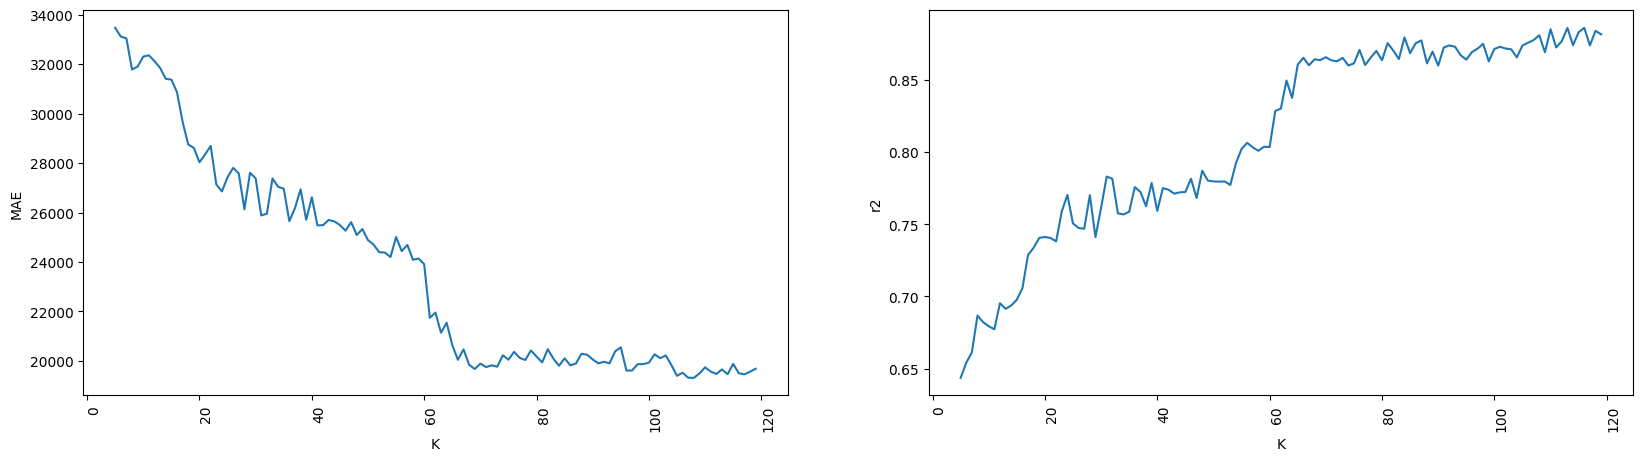

In [35]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### RFE (Recursive feature elimination)

df

from sklearn.feature_selection import RFE,RFECV
rfe=RFE(estimator=model,n_features_to_select=5)
rfe.fit(df.iloc[:,:-1],df.iloc[:,-1])
rfe.get_feature_names_out()

k, mae, rmse, r2 = [], [], [], []
for i in range(10,50):
    rfe=RFE(estimator=model,n_features_to_select=i)
    rfe.fit(df.iloc[:,:-1],df.iloc[:,-1])
    c = df.iloc[:,:-1].columns[rfe.support_]
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

statistic.to_csv("RFE.csv")

statistic=pd.read_csv("RFE.csv")

fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

k, mae, rmse, r2 = [], [], [], []
for i in range(10,15):
    rfe=RFECV(estimator=model,min_features_to_select=i,cv=5)
    rfe.fit(df.iloc[:,:-1],df.iloc[:,-1])
    c = df.iloc[:,:-1].columns[rfe.support_]
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

statistic.to_csv("RFECV.csv")

In [36]:
r=pd.read_csv("r_regression_label_enc.csv")
r=r.iloc[:,1:]
r

,K,MAE,RMSE,r2
0,5,35890.359891,50901.949232,0.662204
1,6,34660.461597,50002.241821,0.674039
2,7,31564.708773,45860.413561,0.725803
3,8,30212.362959,41950.167250,0.770568
4,9,28986.486315,40015.679080,0.791240
...,...,...,...,...
110,115,21814.597153,31668.144146,0.869253
111,116,21786.549622,31645.795929,0.869438
112,117,22088.993428,31976.786881,0.866692
113,118,22124.740073,32005.206735,0.866455


In [37]:
f=pd.read_csv("f_regression_label_enc.csv")
f=f.iloc[:,1:]
f

,K,MAE,RMSE,r2
0,5,34354.505424,51440.370481,0.655020
1,6,33572.804895,50895.643927,0.662287
2,7,31998.620106,47606.662232,0.704524
3,8,31284.920167,46590.490643,0.717004
4,9,31376.756052,46259.713117,0.721008
...,...,...,...,...
110,115,19547.763778,30557.023160,0.878267
111,116,19783.132247,31223.937471,0.872895
112,117,19642.594200,30488.959965,0.878809
113,118,19589.283325,30425.147489,0.879315


In [38]:
mutual=pd.read_csv("mutual_infomation_label_enc.csv")
mutual=mutual.iloc[:,1:]
mutual

,K,MAE,RMSE,r2
0,5,33464.906378,52275.982780,0.643721
1,6,33113.101261,51507.848336,0.654114
2,7,33038.874284,50964.027457,0.661379
3,8,31779.664822,49014.337860,0.686792
4,9,31901.416211,49368.070800,0.682255
...,...,...,...,...
110,115,19878.039227,29991.815409,0.882729
111,116,19502.240237,29601.954484,0.885758
112,117,19458.336650,31134.127455,0.873625
113,118,19565.297686,29867.330843,0.883700


In [39]:
joint=pd.merge(r,f,how='inner',on="K")
joint

,K,MAE_x,RMSE_x,r2_x,MAE_y,RMSE_y,r2_y
0,5,35890.359891,50901.949232,0.662204,34354.505424,51440.370481,0.655020
1,6,34660.461597,50002.241821,0.674039,33572.804895,50895.643927,0.662287
2,7,31564.708773,45860.413561,0.725803,31998.620106,47606.662232,0.704524
3,8,30212.362959,41950.167250,0.770568,31284.920167,46590.490643,0.717004
4,9,28986.486315,40015.679080,0.791240,31376.756052,46259.713117,0.721008
...,...,...,...,...,...,...,...
110,115,21814.597153,31668.144146,0.869253,19547.763778,30557.023160,0.878267
111,116,21786.549622,31645.795929,0.869438,19783.132247,31223.937471,0.872895
112,117,22088.993428,31976.786881,0.866692,19642.594200,30488.959965,0.878809
113,118,22124.740073,32005.206735,0.866455,19589.283325,30425.147489,0.879315


In [40]:
joint=pd.merge(joint,mutual,on="K",how="inner")
joint

,K,MAE_x,RMSE_x,r2_x,MAE_y,RMSE_y,r2_y,MAE,RMSE,r2
0,5,35890.359891,50901.949232,0.662204,34354.505424,51440.370481,0.655020,33464.906378,52275.982780,0.643721
1,6,34660.461597,50002.241821,0.674039,33572.804895,50895.643927,0.662287,33113.101261,51507.848336,0.654114
2,7,31564.708773,45860.413561,0.725803,31998.620106,47606.662232,0.704524,33038.874284,50964.027457,0.661379
3,8,30212.362959,41950.167250,0.770568,31284.920167,46590.490643,0.717004,31779.664822,49014.337860,0.686792
4,9,28986.486315,40015.679080,0.791240,31376.756052,46259.713117,0.721008,31901.416211,49368.070800,0.682255
...,...,...,...,...,...,...,...,...,...,...
110,115,21814.597153,31668.144146,0.869253,19547.763778,30557.023160,0.878267,19878.039227,29991.815409,0.882729
111,116,21786.549622,31645.795929,0.869438,19783.132247,31223.937471,0.872895,19502.240237,29601.954484,0.885758
112,117,22088.993428,31976.786881,0.866692,19642.594200,30488.959965,0.878809,19458.336650,31134.127455,0.873625
113,118,22124.740073,32005.206735,0.866455,19589.283325,30425.147489,0.879315,19565.297686,29867.330843,0.883700


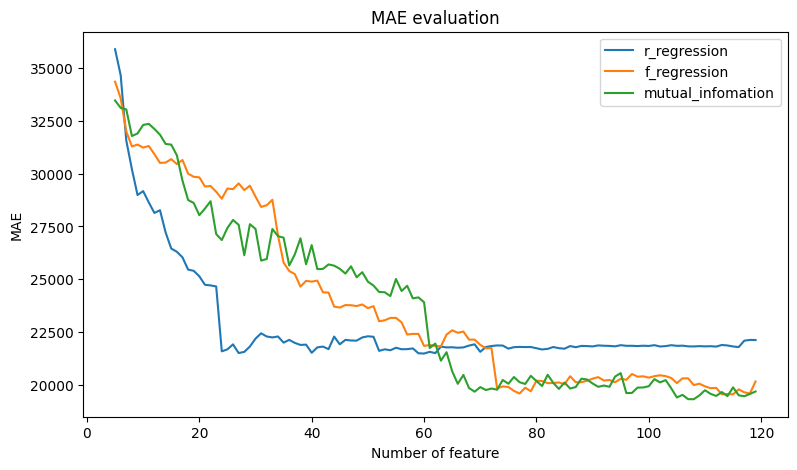

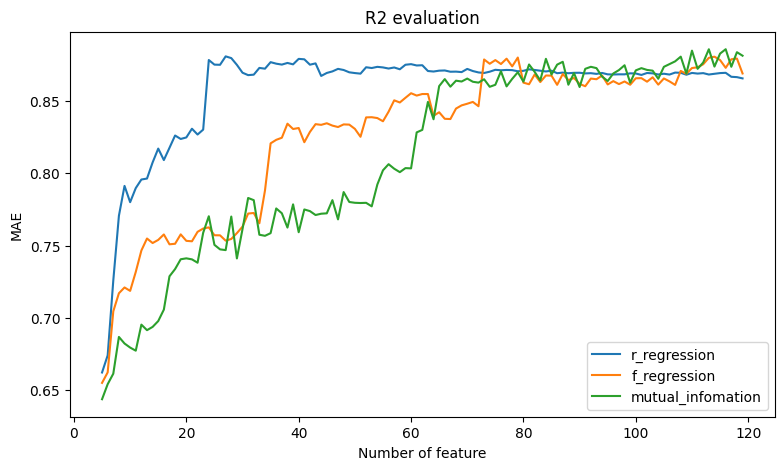

In [41]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(joint["K"],joint["MAE_x"],label="r_regression")
plt.plot(joint["K"],joint["MAE_y"],label="f_regression")
plt.plot(joint["K"],joint["MAE"],label="mutual_infomation")
plt.xlabel("Number of feature")
plt.ylabel("MAE")
plt.title("MAE evaluation") 
plt.legend()
plt.figure(figsize=(20,5))
plt.subplot(1,2,2)
plt.plot(joint["K"],joint["r2_x"],label="r_regression")
plt.plot(joint["K"],joint["r2_y"],label="f_regression")
plt.plot(joint["K"],joint["r2"],label="mutual_infomation")
plt.xlabel("Number of feature")
plt.ylabel("MAE")
plt.title("R2 evaluation") 
plt.legend()